In [1]:
import os
os.chdir("./img_for_editing/2")

In [2]:
!pwd
!ls

/export/home/yyang/PycharmProjects/Image_editing_relighting/img_for_editing/2
6_23_1_23_43_4500_8_Image_input.png
6_23_1_23_43_4500_8_Reconstruct.png
6_23_1_23_43_4500_8_Reflectance_predict.png
6_23_1_23_43_4500_8_Relighted_gt.png
6_23_1_23_43_4500_8_Relighted_predict.png
6_23_1_23_43_4500_8_Shading_new_predict.png
6_23_1_23_43_4500_8_Shading_ori_predict.png


In [3]:
import cv2
from PIL import Image
import cv2
import numpy
import matplotlib.pyplot as plt

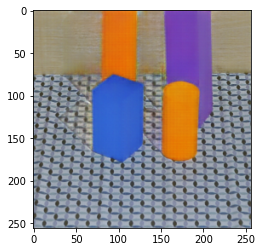

In [4]:
ref_pred = Image.open("6_23_1_23_43_4500_8_Reflectance_predict.png").convert('RGB')
plt.imshow(numpy.array(ref_pred))
plt.show()

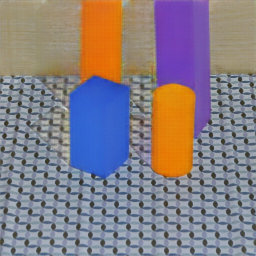

In [5]:
ref_pred

In [6]:
def show_image(img):
    plt.imshow(img.astype('uint8'))
    plt.show()

In [47]:
ref = numpy.array(ref_pred).astype('float')
ref[50, 180]

array([116.,  63., 181.])

In [48]:
ref[150, 100]

array([ 49., 100., 209.])

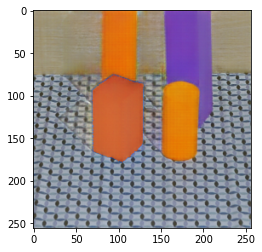

In [49]:
ref = numpy.array(ref_pred).astype('float')
for i in range(256):
    for j in range(256):
        color = ref[i, j]
        if color[2] > 150 and color[0] < 80 and color [1] < color[2]-30:
            temp = color[2]
            color[2] = color[0]
            color[0] = temp
        # if color[0] > 200 and color [2] < 50:
        #     temp = color[2]
        #     color[2] = color[0]
        #     color[0] = temp
show_image(ref)

In [52]:
cv2.imwrite('ref_test.png', ref[:, :, [2,1,0]].astype('uint8'))

True

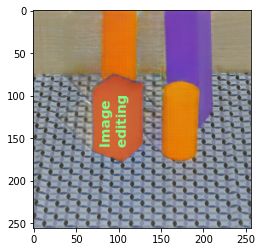

In [53]:
ref_edit = Image.open("ref_test_edit.png").convert('RGB')
plt.imshow(numpy.array(ref_edit))
plt.show()

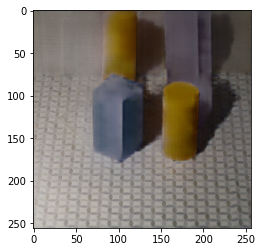

In [54]:
shading_new = Image.open("6_23_1_23_43_4500_8_Shading_new_predict.png").convert('RGB')
plt.imshow(numpy.array(shading_new))
plt.show()

In [55]:
ref_edit = numpy.array(ref_edit).astype('float')
shading_new = numpy.array(shading_new).astype('float')
img_relit_edit = ref_edit * shading_new / 255.0

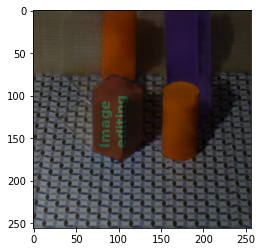

In [56]:
show_image(img_relit_edit)

In [57]:
cv2.imwrite('img_relit_edit.png', img_relit_edit[:, :, [2,1,0]].astype('uint8'))

True

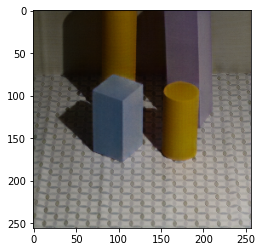

In [58]:
shading_ori = Image.open("6_23_1_23_43_4500_8_Shading_ori_predict.png").convert('RGB')
plt.imshow(numpy.array(shading_ori))
plt.show()

In [59]:
shading_ori = numpy.array(shading_ori).astype('float')
img_edit = ref_edit * shading_ori / 255.0
cv2.imwrite('img_edit.png', img_edit[:, :, [2,1,0]].astype('uint8'))

True